<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:
* `skillsnetwork` to download the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [ ]:
# For the purpose of learning, libraries are imported as needed rather than pre-imported to better understand which library is being used.

### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [4]:
await download(filepath, "insurance.csv")
file_name="insurance.csv"

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
#df = pd.read_csv(filepath, header=None)

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(file_name)
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


Add the headers to the dataframe, as mentioned in the project scenario. 


In [7]:
df.columns = headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df.head()


,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


Now, replace the '?' entries with 'NaN' values.


In [8]:
import numpy as np

In [9]:
df.replace('?', np.NaN, inplace=True)

# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


Handle missing data:

1. For continuous attributes (e.g., age), replace missing values with the mean.
2. For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
3. Update the data types of the respective columns.
4. Verify the update using `df.info()`.


In [11]:
# Note: isnull does NOT recognize '?'. That's why we replace '?' earlier with NaN (Not a Number), Python's default missing value marker 
missing_data = df.isnull()

# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----")    

age
False    2767
True        4
Name: age, dtype: int64
-----
gender
False    2771
Name: gender, dtype: int64
-----
bmi
False    2771
Name: bmi, dtype: int64
-----
no_of_children
False    2771
Name: no_of_children, dtype: int64
-----
smoker
False    2764
True        7
Name: smoker, dtype: int64
-----
region
False    2771
Name: region, dtype: int64
-----
charges
False    2771
Name: charges, dtype: int64
-----


In [12]:
# From the output, we can see that age and smoker are the only ones that have missing values. As such, we can narrow down our work to these two.

# For age, since it is a continuous attribute, we can replace its missing values with the mean.
avg_age = df['age'].astype('float').mean()
df['age'].replace(np.NaN, avg_age, inplace=True)

# After replacing the missing values, this should display zero as opposed to four.
df['age'].isnull().sum()

0

In [13]:
# For smoker, since it is a categorical attribute, we can replace its missing values with the most frequent value
most_freq_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.NaN, most_freq_smoker, inplace=True)

df['smoker'].isnull().sum()

0

In [14]:
# Update columns to their correct data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

In [15]:
# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [16]:
df["charges"] = np.round(df["charges"],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 66902.85800000001)

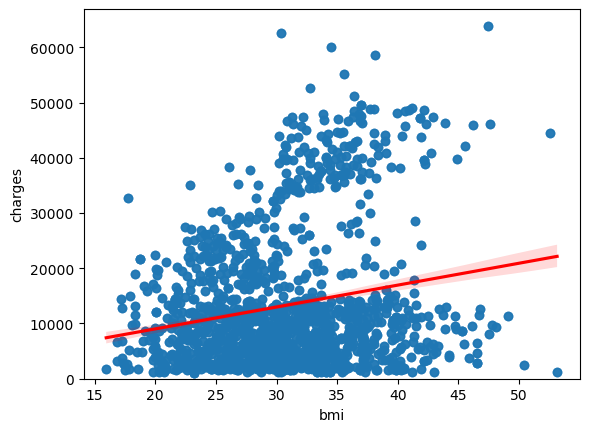

In [19]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={'color': 'red'})
plt.ylim(0,)

Implement the box plot for `charges` with respect to `smoker`.


<AxesSubplot:xlabel='smoker', ylabel='charges'>

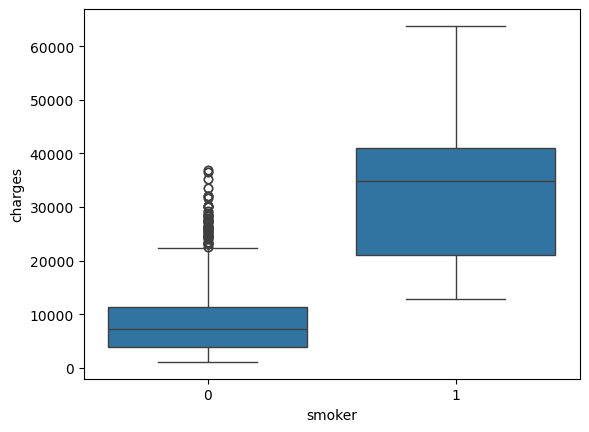

In [20]:
sns.boxplot(x="smoker", y="charges", data=df)

Print the correlation matrix for the dataset.


In [21]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [26]:
# Import library
from sklearn.linear_model import LinearRegression

# Create LinearRegression object
lm = LinearRegression()

# Get predictor and target variables
X = df[['smoker']]
Y = df['charges']

# Train
lm.fit(X,Y)

# Parameters
b0 = lm.intercept_
b1 = lm.coef_

print('Intercept: ', b0)
print('Slope: ', b1)

# R^2
print('R^2: ',lm.score(X,Y))

Intercept:  8417.874393115811
Slope:  [23832.50915928]
R^2:  0.6227430402464125


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [32]:
# Get all predictors
Z = df.drop('charges', axis=1)
# Alternately
# Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]

# Train the model
lm.fit(Z,Y)

# R^2
print('R^2: ',lm.score(Z,Y))

0.7505888664568174


In [ ]:
# R^2 score is higher for this model. As expected, using more variables to fit the model improves its performance.

Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
